<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Корректировка-таблиц" data-toc-modified-id="Корректировка-таблиц-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Корректировка таблиц</a></span><ul class="toc-item"><li><span><a href="#Таблица-звонки" data-toc-modified-id="Таблица-звонки-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Таблица звонки</a></span></li><li><span><a href="#Таблица-сообщения" data-toc-modified-id="Таблица-сообщения-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Таблица сообщения</a></span></li><li><span><a href="#Таблица-интернет" data-toc-modified-id="Таблица-интернет-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Таблица интернет</a></span></li><li><span><a href="#Таблица-пользователи" data-toc-modified-id="Таблица-пользователи-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Таблица пользователи</a></span></li></ul></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Помесячная-выручка-с-каждого-клиента" data-toc-modified-id="Помесячная-выручка-с-каждого-клиента-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Помесячная выручка с каждого клиента</a></span><ul class="toc-item"><li><span><a href="#Сравнение-тарифов-Смарт-и-Ультра" data-toc-modified-id="Сравнение-тарифов-Смарт-и-Ультра-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сравнение тарифов Смарт и Ультра</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов." data-toc-modified-id="Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Анализ тарифов для оператора сотовой связи. 

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

In [2]:
try:
    df_calls = pd.read_csv('/calls.csv')
    df_internet = pd.read_csv('internet.csv',  index_col=0)
    df_messages = pd.read_csv('/messages.csv')
    df_tariffs = pd.read_csv('/tariffs.csv')
    df_users = pd.read_csv('/users.csv')
except:
    df_calls = pd.read_csv('data/calls.csv')
    df_internet = pd.read_csv('data/internet.csv',  index_col=0)
    df_messages = pd.read_csv('data/messages.csv')
    df_tariffs = pd.read_csv('data/tariffs.csv')
    df_users = pd.read_csv('data/users.csv')

### Знакомство с данными

Необходимо проверить в каждой таблице:
- Пропуски
- Дубликаты
- Типы данных

In [3]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000
5,1000_5,2018-11-02,0.000,1000
6,1000_6,2018-10-18,0.000,1000
7,1000_7,2018-08-22,18.310,1000
8,1000_8,2018-09-15,18.440,1000
9,1000_9,2018-08-15,0.000,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_calls.isna().mean() 

id          0.000
call_date   0.000
duration    0.000
user_id     0.000
dtype: float64

In [6]:
print('Число дубликатов:', df_calls.duplicated().sum())

Число дубликатов: 0


Пропусков и дубликатов нет, корректировка типа данных нужна для столбца duration т.к нам нужен числовой тип данных. 

In [7]:
df_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.950,2018-11-25,1000
1,1000_1,1052.810,2018-09-07,1000
2,1000_2,1197.260,2018-06-25,1000
3,1000_3,550.270,2018-08-22,1000
4,1000_4,302.560,2018-09-24,1000
5,1000_5,399.970,2018-10-02,1000
6,1000_6,540.080,2018-09-07,1000
7,1000_7,415.700,2018-07-11,1000
8,1000_8,505.400,2018-10-08,1000
9,1000_9,345.540,2018-09-03,1000


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
df_internet.isna().mean() 

id             0.000
mb_used        0.000
session_date   0.000
user_id        0.000
dtype: float64

In [10]:
print('Число дубликатов:', df_internet.duplicated().sum())

Число дубликатов: 0


Пропусков и дубликатов нет.

In [11]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
df_messages.isna().mean() 

id             0.000
message_date   0.000
user_id        0.000
dtype: float64

In [14]:
print('Число дубликатов:', df_messages.duplicated().sum())

Число дубликатов: 0


Пропусков и дубликатов нет.

In [15]:
df_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
df_tariffs.isna().mean() 

messages_included       0.000
mb_per_month_included   0.000
minutes_included        0.000
rub_monthly_fee         0.000
rub_per_gb              0.000
rub_per_message         0.000
rub_per_minute          0.000
tariff_name             0.000
dtype: float64

In [18]:
print('Число дубликатов:', df_tariffs.duplicated().sum())

Число дубликатов: 0


Пропусков и дубликатов нет.

In [19]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
df_users.isna().mean() 

user_id      0.000
age          0.000
churn_date   0.924
city         0.000
first_name   0.000
last_name    0.000
reg_date     0.000
tariff       0.000
dtype: float64

In [22]:
print('Число дубликатов:', df_users.duplicated().sum())

Число дубликатов: 0


По условиям выборки если значение в churn_date пропущено, то тариф ещё действовал на момент выгрузки данных. 

Предварительный вывод:
Необходимо провести корректировку типа данных во всех датах в таблицах. Таблицы выгружены корректно. 
В таблице Звонки необходимо поменять тип данных в столбце с длительностью звонков.
В таблице

### Корректировка таблиц

#### Таблица звонки

В таблице calls преобразуем дату и длительность звонков для удобства работы.

In [23]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

Добавим столбцы с категорией месяца и с началом календарного месяца.

In [24]:
df_calls['month_num'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')

По условиям: «Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Преведем замену, а заодно и изменим тип данных. 

In [25]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [26]:
df_calls.head()

,id,call_date,duration,user_id,month_num,month
0,1000_0,2018-07-25,0,1000,7,2018-07-01
1,1000_1,2018-08-17,0,1000,8,2018-08-01
2,1000_2,2018-06-11,3,1000,6,2018-06-01
3,1000_3,2018-09-21,14,1000,9,2018-09-01
4,1000_4,2018-12-15,6,1000,12,2018-12-01


In [27]:
def hist_maker(column):
    print(column.describe())
    plt.figure(figsize=(10,6))
    plt.hist(column, bins=30, color='grey', edgecolor='grey', alpha=0.8)
    plt.axvline(column.describe()['mean'], color='r', linestyle='dashed', linewidth=3, label='Mean value: {:.2f}'.format(column.describe()['mean']))
    plt.axvline(column.describe()['50%'], color='b', linestyle='dotted', linewidth=3, label='Median value: {:.0f}'.format(column.describe()['50%']))
    plt.legend()
    plt.title('Histogramm {}'.format(column.name))

count   202607.000
mean         7.158
std          5.959
min          0.000
25%          2.000
50%          6.000
75%         11.000
max         38.000
Name: duration, dtype: float64


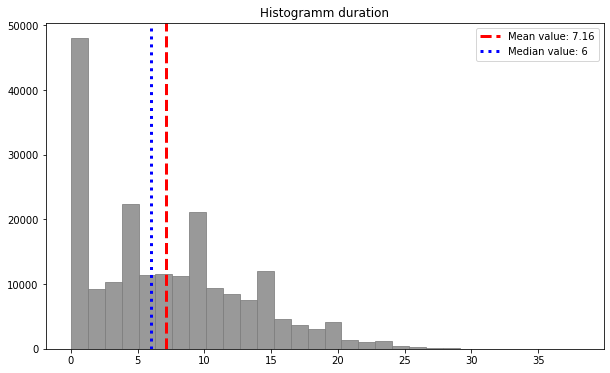

In [28]:
hist_maker(df_calls['duration'])

Максимальное время разговора абонента 38 минут, среднее же и медиана близки - 7 минут и 6 минут. 

#### Таблица сообщения

Проведем те же операции: откорректируем дату и добавим соответствующие столбцы.

In [29]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'] , format='%Y-%m-%d')
df_messages['month_num'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')

In [30]:
df_messages.head()

,id,message_date,user_id,month_num,month
0,1000_0,2018-06-27,1000,6,2018-06-01
1,1000_1,2018-10-08,1000,10,2018-10-01
2,1000_2,2018-08-04,1000,8,2018-08-01
3,1000_3,2018-06-16,1000,6,2018-06-01
4,1000_4,2018-12-05,1000,12,2018-12-01


count   2717.000
mean      45.284
std       35.051
min        1.000
25%       19.000
50%       38.000
75%       63.000
max      224.000
Name: messages, dtype: float64
Amount of clients used the service (messages): 426


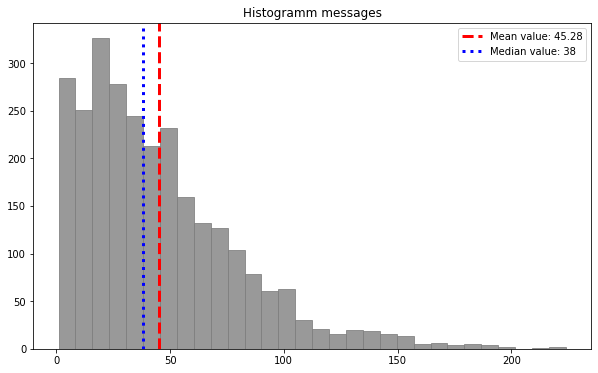

In [31]:
messages_count = df_messages.groupby(['user_id','month_num']).agg(
    messages = ('id', 'count')
).reset_index()

hist_maker(messages_count['messages'])
print('Amount of clients used the service (messages):',messages_count['user_id'].nunique())

Рекорд по отправке сообщений - 338 шт, но в среднем пользователи отправляют 45 сообщений. Медиана меньше - 38 сообщений. 

#### Таблица интернет

Также корректировка даты и добавление колонок.

In [32]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'] , format='%Y-%m-%d')
df_internet['month_num'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')

In [33]:
df_internet.head()

,id,mb_used,session_date,user_id,month_num,month
0,1000_0,112.950,2018-11-25,1000,11,2018-11-01
1,1000_1,1052.810,2018-09-07,1000,9,2018-09-01
2,1000_2,1197.260,2018-06-25,1000,6,2018-06-01
3,1000_3,550.270,2018-08-22,1000,8,2018-08-01
4,1000_4,302.560,2018-09-24,1000,9,2018-09-01


count   3203.000
mean      46.643
std       18.696
min        1.000
25%       35.000
50%       48.000
75%       59.000
max      118.000
Name: internet, dtype: float64
Amount of clients used the service (internet): 497


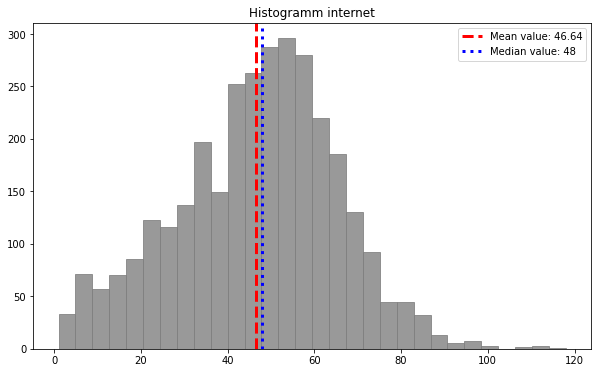

In [34]:
internet_count = df_internet.groupby(['user_id','month_num']).agg(
    internet = ('id', 'count')
).reset_index()

hist_maker(internet_count['internet'])
print('Amount of clients used the service (internet):',internet_count['user_id'].nunique())

Медиана и среднее по абоентам почти одинаковы,  46МБ и 48МБ. 

Необходимо помнить, что по условию: общая сумма за месяц для веб-трафика округлятся в бо́льшую сторону.

#### Таблица пользователи

Поработаем с датами.

In [35]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'] , format='%Y-%m-%d')
df_users['month_num'] = pd.DatetimeIndex(df_users['reg_date']).month
df_users['month'] = df_users['reg_date'].astype('datetime64[M]')

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'] , format='%Y-%m-%d')
df_users['churn_month_num'] = pd.DatetimeIndex(df_users['churn_date']).month
df_users['churn_month'] = df_users['churn_date'].astype('datetime64[M]')


In [36]:
df_users.head(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_num,month,churn_month_num,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,2018-05-01,NaN,NaT
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,2018-11-01,NaN,NaT
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,2018-06-01,NaN,NaT
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,2018-08-01,NaN,NaT
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,2018-05-01,NaN,NaT
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1,2018-01-01,NaN,NaT
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2,2018-02-01,NaN,NaT
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart,4,2018-04-01,NaN,NaT
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,12,2018-12-01,NaN,NaT
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart,3,2018-03-01,NaN,NaT


### Выводы:
Среднестатистического абонента по нашим графикам можно описать так: 

- разговор занимает 6-7 минут;
- отправляет, в среднем, 38 сообщений;
- и для выхода в интернет ему требуется 46МБ. 

## Помесячная выручка с каждого клиента

Посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [37]:
calls = df_calls.groupby(['user_id', 'month_num'])['duration'].agg(['count', 'sum'])
msgs = df_messages.groupby(['user_id', 'month_num'])['id'].agg(['count'])
internet = df_internet.groupby(['user_id', 'month_num' ]).sum()['mb_used']

Сводная таблица:

In [38]:
data = pd.concat([calls, msgs, internet], axis=1)
data= data.reset_index()
data.head(10)

,user_id,month_num,count,sum,count,mb_used
0,1000,5,22.000,159.000,22.000,2253.490
1,1000,6,43.000,172.000,60.000,23233.770
2,1000,7,47.000,340.000,75.000,14003.640
3,1000,8,52.000,408.000,81.000,14055.930
4,1000,9,58.000,466.000,57.000,14568.910
5,1000,10,57.000,350.000,73.000,14702.490
6,1000,11,43.000,338.000,58.000,14756.470
7,1000,12,46.000,333.000,70.000,9817.610
8,1001,11,59.000,430.000,NaN,18429.340
9,1001,12,63.000,414.000,NaN,14036.660


In [39]:
data['mb_used'] = np.ceil(data['mb_used'])

Нужно переименовать колонки.

In [40]:
data.columns = ['user_id', 'month', 'calls', 'calls_duration', 
                            'messeges', 'internet']

In [41]:
data = data.reset_index()
data.head(10)

,index,user_id,month,calls,calls_duration,messeges,internet
0,0,1000,5,22.000,159.000,22.000,2254.000
1,1,1000,6,43.000,172.000,60.000,23234.000
2,2,1000,7,47.000,340.000,75.000,14004.000
3,3,1000,8,52.000,408.000,81.000,14056.000
4,4,1000,9,58.000,466.000,57.000,14569.000
5,5,1000,10,57.000,350.000,73.000,14703.000
6,6,1000,11,43.000,338.000,58.000,14757.000
7,7,1000,12,46.000,333.000,70.000,9818.000
8,8,1001,11,59.000,430.000,NaN,18430.000
9,9,1001,12,63.000,414.000,NaN,14037.000


Добавим столбцы тариф и город.

In [42]:
map_to_fill_city = dict(pd.Series(df_users['city'].values, index=df_users['user_id']))
data['city'] = data['user_id'].map(map_to_fill_city)

map_to_fill_tariff = dict(pd.Series(df_users['tariff'].values, index=df_users['user_id']))
data['tariff'] = data['user_id'].map(map_to_fill_tariff)

data.head(10)

,index,user_id,month,calls,calls_duration,messeges,internet,city,tariff
0,0,1000,5,22.000,159.000,22.000,2254.000,Краснодар,ultra
1,1,1000,6,43.000,172.000,60.000,23234.000,Краснодар,ultra
2,2,1000,7,47.000,340.000,75.000,14004.000,Краснодар,ultra
3,3,1000,8,52.000,408.000,81.000,14056.000,Краснодар,ultra
4,4,1000,9,58.000,466.000,57.000,14569.000,Краснодар,ultra
5,5,1000,10,57.000,350.000,73.000,14703.000,Краснодар,ultra
6,6,1000,11,43.000,338.000,58.000,14757.000,Краснодар,ultra
7,7,1000,12,46.000,333.000,70.000,9818.000,Краснодар,ultra
8,8,1001,11,59.000,430.000,NaN,18430.000,Москва,smart
9,9,1001,12,63.000,414.000,NaN,14037.000,Москва,smart


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3214 non-null   int64  
 1   user_id         3214 non-null   int64  
 2   month           3214 non-null   int64  
 3   calls           3174 non-null   float64
 4   calls_duration  3174 non-null   float64
 5   messeges        2717 non-null   float64
 6   internet        3203 non-null   float64
 7   city            3214 non-null   object 
 8   tariff          3214 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 226.1+ KB


Есть пропуски в выборке, возможно, некоторые клиенты не пользовались своим тарифом на 100%(не звонили или не писали СМС). Заменим значения в таких столбцах на 0.

In [44]:
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3214 non-null   int64  
 1   user_id         3214 non-null   int64  
 2   month           3214 non-null   int64  
 3   calls           3214 non-null   float64
 4   calls_duration  3214 non-null   float64
 5   messeges        3214 non-null   float64
 6   internet        3214 non-null   float64
 7   city            3214 non-null   object 
 8   tariff          3214 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 226.1+ KB


Теперь данных достаточно, можно приступать к расчетам выручки. 

Переименуем колонку в таблице tariffs

In [45]:
df_tariffs.rename(columns = {'tariff_name' : 'tariff'}, inplace = True)
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Склеим две таблицы

In [46]:
data = data.merge(df_tariffs, on = ['tariff'], how = 'left')
data.head(10)

,index,user_id,month,calls,calls_duration,messeges,internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,0,1000,5,22.000,159.000,22.000,2254.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1,1000,6,43.000,172.000,60.000,23234.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,2,1000,7,47.000,340.000,75.000,14004.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,3,1000,8,52.000,408.000,81.000,14056.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,4,1000,9,58.000,466.000,57.000,14569.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
5,5,1000,10,57.000,350.000,73.000,14703.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
6,6,1000,11,43.000,338.000,58.000,14757.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
7,7,1000,12,46.000,333.000,70.000,9818.000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
8,8,1001,11,59.000,430.000,0.000,18430.000,Москва,smart,50,15360,500,550,200,3,3
9,9,1001,12,63.000,414.000,0.000,14037.000,Москва,smart,50,15360,500,550,200,3,3


In [48]:
def calculate(row):
    var = row.rub_monthly_fee
    if (row.messeges > row.messages_included):
        var += (row.messeges - row.messages_included)*row.rub_per_message
    if (row.calls_duration > row.minutes_included):
        var += (row.calls_duration - row.minutes_included)*row.rub_per_minute
    if (row.internet > row.mb_per_month_included):
        var +=  np.ceil((row.internet - row.mb_per_month_included)/1024)*row.rub_per_gb
    return round(var,2)

Создадим новый столбец с переплатами абонентов на конец месяца:

In [49]:
data['month_revenue'] = data.apply(calculate, axis = 1)
data.head(10)

,index,user_id,month,calls,calls_duration,messeges,internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
0,0,1000,5,22,159,22,2254,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
1,1,1000,6,43,172,60,23234,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
2,2,1000,7,47,340,75,14004,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
3,3,1000,8,52,408,81,14056,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
4,4,1000,9,58,466,57,14569,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
5,5,1000,10,57,350,73,14703,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
6,6,1000,11,43,338,58,14757,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
7,7,1000,12,46,333,70,9818,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000
8,8,1001,11,59,430,0,18430,Москва,smart,50,15360,500,550,200,3,3,1150.000
9,9,1001,12,63,414,0,14037,Москва,smart,50,15360,500,550,200,3,3,550.000


Видно, что есть абоненты, которые превышают ежемесячные лимиты. 

### Сравнение тарифов Смарт и Ультра

In [50]:
def hist_maker_and_table(df, name,x_1_smart,x_2_ultra):
    cd = df.groupby(df.tariff)[name]
    cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
    cd_desc['var']= [np.var(cd.get_group('smart'), ddof=1), np.var(cd.get_group('ultra'), ddof=1)]
    display(cd_desc)
    smart = df.query('tariff == "smart"')[name]
    ultra = df.query('tariff == "ultra"')[name]
    plt.figure(figsize=(10,6))
    plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
    plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
    plt.axvline(cd_desc['mean'][0], color='blue', linestyle='dashed', linewidth=3, label='Mean smart: {:.2f}'.format(cd_desc['mean'][0]))
    
    plt.axvline(cd_desc['mean'][1], color='orange', linestyle='dashed', linewidth=3, label='Mean ultra: {:.2f}'.format(cd_desc['mean'][1]))

    plt.axvline(x_1_smart, color='blue', linestyle='solid', linewidth=3, label='Входит в тариф Смарт')
    plt.axvline(x_2_ultra, color='orange', linestyle='solid', linewidth=3, label='Входит в тариф Ультра')
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.title('Histogramm {}'.format(name))

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.000,417.935,190.314,0.000,15.280,282.000,422.000,545.000,872.720,1435.000,36219.316
ultra,985.000,526.623,317.606,0.000,0.000,284.000,518.000,752.000,1291.120,1673.000,100873.633


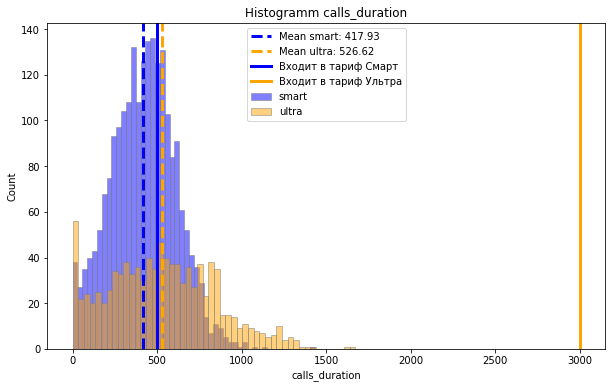

In [51]:
hist_maker_and_table(data,'calls_duration',500,3000)

Из графика видно, что абонентам тарифа Смарт в большинстве случаев не хватает заложенных в абонентскую плату минут, что приводит к переплате по этому пункту. По тарифу Ультра чаще вообще не используют весь пакет минут. Среднее же по обоим тарифам близко к максимальному количеству пакета минут по тарифу Смарт. Также есть вбросы, поэтому обозначим границы значений для тарифов.   

СРАВНЕНИЕ ТАРИФА ULTRA И SMART


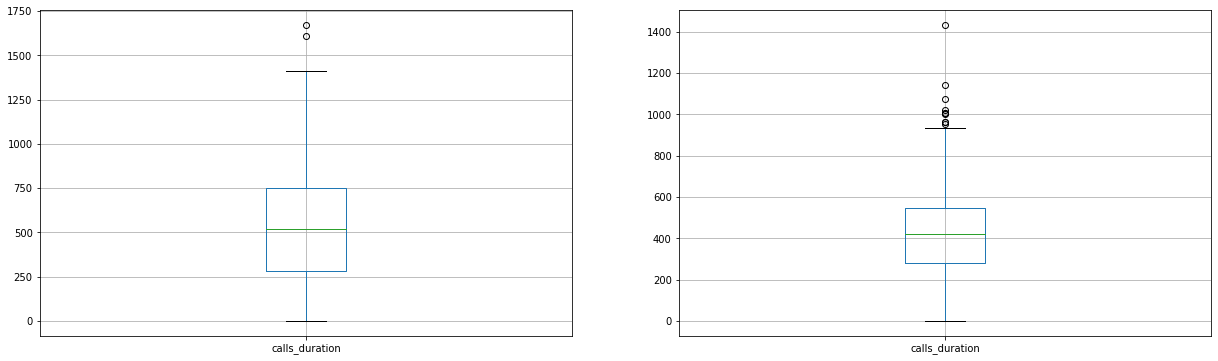

In [52]:
print('СРАВНЕНИЕ ТАРИФА ULTRA И SMART')
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'ultra'].boxplot('calls_duration', ax = plt.subplot(1,2,1))
data[data['tariff'] == 'smart'].boxplot('calls_duration', ax = plt.subplot(1,2,2));

Границами интервала для тарифа Смарт можно определить 0- 950 минут, для тарифа Ультра: 0- 1450 минут. Остальное считаем вбросами.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.000,33.384,28.228,0.000,0.000,10.000,28.000,51.000,108.000,143.000,796.813
ultra,985.000,49.363,47.804,0.000,0.000,6.000,38.000,79.000,183.320,224.000,2285.266


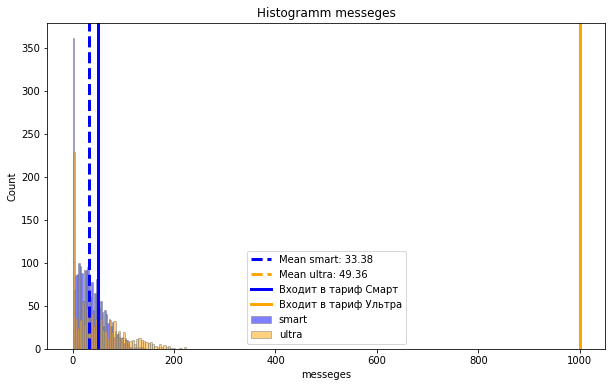

In [53]:
hist_maker_and_table(data,'messeges',50,1000)

С сообщениями картина выглядит еще интереснее, по тарифу Ультра абоненты не используют даже половину заложенных бесплатных сообщений. В тарифе Смарт пользователи чаще докупают пакет сообщений, но большинство укладывается в лимит. Определим границы для отсеивания вбросов.

СРАВНЕНИЕ ТАРИФА ULTRA и SMART


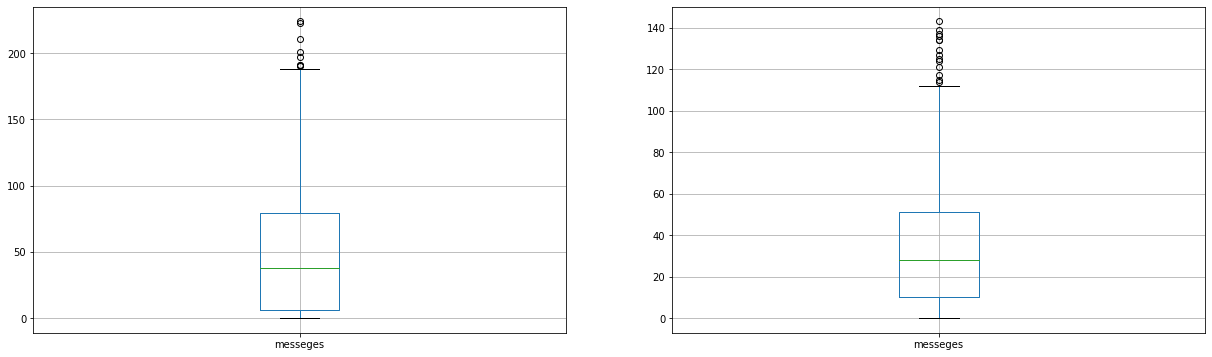

In [54]:
print('СРАВНЕНИЕ ТАРИФА ULTRA и SMART')
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'ultra'].boxplot('messeges', ax = plt.subplot(1,2,1))
data[data['tariff'] == 'smart'].boxplot('messeges', ax = plt.subplot(1,2,2));

Границами интервала для тарифа Ультра можно определить 0- 180 шт, для тарифа Смарт: 0- 110 шт. Остальное считаем вбросами.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2229.000,16208.873,5870.482,0.000,1496.600,12644.000,16507.000,20043.000,29694.480,38553.000,34462562.806
ultra,985.000,19469.309,10087.198,0.000,0.000,11771.000,19309.000,26838.000,43006.360,49746.000,101751557.966


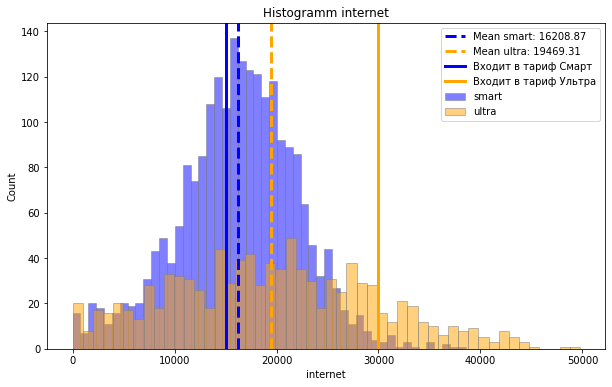

In [55]:
hist_maker_and_table(data,'internet',15000,30000)

Тут видно, что пользователи обоих тарифов докупают интернет-трафик. По тарифу Смарт абоненты совсем немного не укладываются в лимит, по Ультра же распределение более ровное. 

СРАВНЕНИЕ ТАРИФА ULTRA и SMART


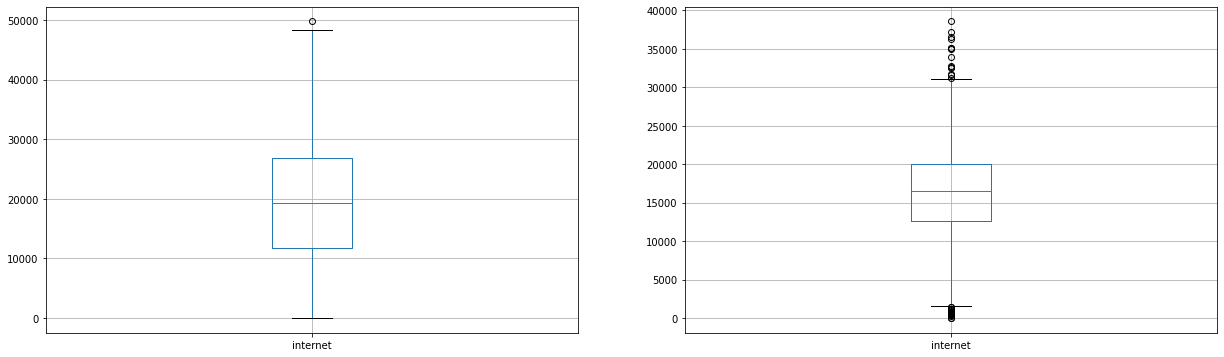

In [56]:
print('СРАВНЕНИЕ ТАРИФА ULTRA и SMART')
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'ultra'].boxplot('internet', ax = plt.subplot(1,2,1))
data[data['tariff'] == 'smart'].boxplot('internet', ax = plt.subplot(1,2,2));

Границами интервала для тарифа Ультра можно определить 0 - 49 Гб шт, для тарифа Смарт: 1.5- 31 Гб. Остальное считаем вбросами.

Посмотрим какая часть абонентов использует тариф Смарт, а какая - Ультра:

In [57]:
data.groupby(['tariff'])['user_id'].agg(['count'])

,count
tariff,
smart,2229
ultra,985


70% абонентов пользуются тарифом Смарт,но посмотрим, кто прибыльнее.

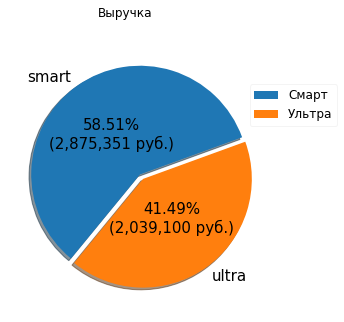

In [58]:
all_revenue = data['month_revenue'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = data.groupby('tariff')['month_revenue'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

Прибыль по тарифу Смарт выше,за счет количества пользователей. 

### Вывод

- Пользователи тарифа Смарт в среднем в месяц тратят меньше минут разговора, чем пользователи тарифа Ультра.
- На тарифе Смарт пользователи часто не укладываются в лимиты и доплачивают за звонки.
- Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число минут разговора и сообщений в месяц значительно меньше заложенных в него.
- Большую часть выручки приносит тариф Смарт
- Очень неравномерно заложены базовые лимиты в тарифы, можно сделать их более удобными для абонента. 

## Гипотезы

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза: Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е. средние значения равны.

Альтернативная гипотеза: Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е. средние значения не равны.

Дисперсии выборок были расчитаны выше, они отличаются более чем на 5%

In [59]:
sample_1 = data[data['tariff'] == 'ultra']['month_revenue'] 
sample_2 = data[data['tariff'] == 'smart']['month_revenue'] 
results = st.ttest_ind( sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  1.4229814360764067e-160
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, т.е. маловероятна случайность результатов теста гипотезы.Это ожидаемо тк абонентская плата за тариф Ультра выше в 3 раза (1950 руб против 550 руб). 

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: Н0 - Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. 

Альтернативная гипотеза: Н1 - Средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

Для расчета добавим колонку с признаком: Москва -1, не Москва - 0. 

In [60]:
data['is_Moscow'] = np.where(data['city'] == 'Москва', 1, 0)

In [61]:
data.head(10)

,index,user_id,month,calls,calls_duration,messeges,internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue,is_Moscow
0,0,1000,5,22,159,22,2254,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
1,1,1000,6,43,172,60,23234,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
2,2,1000,7,47,340,75,14004,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
3,3,1000,8,52,408,81,14056,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
4,4,1000,9,58,466,57,14569,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
5,5,1000,10,57,350,73,14703,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
6,6,1000,11,43,338,58,14757,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
7,7,1000,12,46,333,70,9818,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000,0
8,8,1001,11,59,430,0,18430,Москва,smart,50,15360,500,550,200,3,3,1150.000,1
9,9,1001,12,63,414,0,14037,Москва,smart,50,15360,500,550,200,3,3,550.000,1


In [62]:
sample_1 = data[data['is_Moscow'] == 0]['month_revenue'] 
sample_2 = data[data['is_Moscow'] == 1]['month_revenue'] 
results = st.ttest_ind( sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.5440152911670224
Опровергнуть нулевую гипотезу нельзя


Таким образом, верно утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Вывод

На основе проведенного анализа можно сделать вывод, что тариф Смарт приносит компании около 60% всей выручки, но при этом на него приходится 2229 пользователей. Тариф Ультра дает остальные 40%, но эту выручку генерируют всего 985 пользователей. 

По гистограммам видно, что дисперсия по тарифу Смарт меньше, чем у пользователей с тарифом Ультра по всем показателям: по числу использованных минут, числу сообщений и потраченным МБ. Также на гистограммах видно, что средние значения не сильно различаются друг от друга по всем показателям обоих тарифов. 
Получатется, что абоненты с тарифом Ультра более свободны в выборе того, как именно использовать объемы тарифного пакета, однако обоим тарифам абоненты доплачивают в основном за интернет и минуты. 

Выгодным для создания рекламной акции можно посчитать тариф Ультра, вне зависимости от местонахождения пользователей(Москва или регионы). Средняя выручка по обоим тарифам различается за счет того, что абонентская плата по тарифу Ультра в 3 раза больше, чем по тарифу Смарт, но этого не видно в основном объеме прибыли т.к. абонентов с тарифом Смарт больше.

Также можно порекомендовать создание "промежуточного"тарифного плана на основе статистических данных. 